In [20]:
# Задание №1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
feature_names = boston["feature_names"]
data = boston["data"]
target = boston["target"]

In [11]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

In [18]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

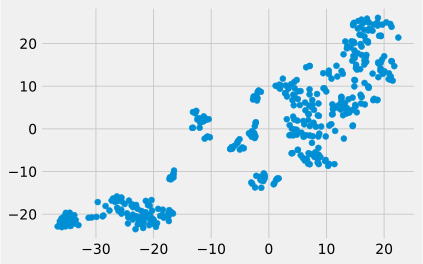

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [21]:
# Задание №2

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

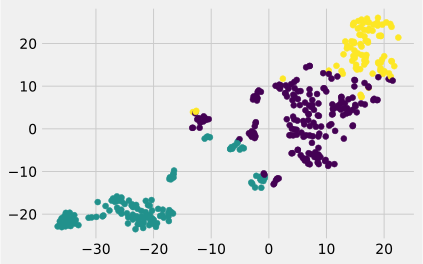

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [43]:
print('Кластер 0 - price: ', y_train[labels_train == 0].mean())
print('Кластер 0 - CRIM: ', X_train.loc[labels_train == 0, 'CRIM'].mean())

Кластер 0 - price:  price    24.958115
dtype: float64
Кластер 0 - CRIM:  0.42166020942408367


In [44]:
print('Кластер 1  - price: ', y_train[labels_train == 1].mean())
print('Кластер 1 - CRIM: ', X_train.loc[labels_train == 1, 'CRIM'].mean())

Кластер 1  - price:  price    16.165354
dtype: float64
Кластер 1 - CRIM:  10.797028425196853


In [45]:
print('Кластер 2 - price: ', y_train[labels_train == 2].mean())
print('Кластер 2 - CRIM: ', X_train.loc[labels_train == 2, 'CRIM'].mean())

Кластер 2 - price:  price    27.788372
dtype: float64
Кластер 2 - CRIM:  0.07356558139534886


In [42]:
# Задание №3

In [46]:
labels_test = kmeans.predict(X_test_scaled)

In [48]:
print('Кластер 0 - price: ', y_test[labels_test == 0].mean())
print('Кластер 0 - CRIM: ', X_test.loc[labels_test == 0, 'CRIM'].mean())

Кластер 0 - price:  price    21.860784
dtype: float64
Кластер 0 - CRIM:  0.26607882352941176


In [49]:
print('Кластер 1 - price: ', y_test[labels_test == 1].mean())
print('Кластер 1 - CRIM: ', X_test.loc[labels_test == 1, 'CRIM'].mean())

Кластер 1 - price:  price    16.437143
dtype: float64
Кластер 1 - CRIM:  10.165531142857143


In [50]:
print('Кластер 2 - price: ', y_test[labels_test == 2].mean())
print('Кластер 2 - CRIM: ', X_test.loc[labels_test == 2, 'CRIM'].mean())

Кластер 2 - price:  price    31.35
dtype: float64
Кластер 2 - CRIM:  0.062060000000000004
